In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic

## Optimization

In [3]:
from scipy.optimize import minimize

Minimize $f(x)=(x-3)^2$

In [4]:
def f(x):
    return (x-3)**2

res = minimize(f, 2)
#res
res.x

array([2.99999999])

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$x-2y+2>0$ <br>
$-x-2y+6\ge0$ <br>
$-x+2y+2\ge0$ <br>
$x\ge0$ <br>
$y\ge0$ <br>

In [5]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type':'ineq', 'fun': lambda x: x[0]-2*x[1]+2},
        {'type':'ineq', 'fun': lambda x: -x[0]-2*x[1]+6},
        {'type':'ineq', 'fun': lambda x: -x[0]+2*x[1]+2})
bnds = ((0, None), (0, None))

res = minimize(f, (2, 0), bounds=bnds, constraints=cons)
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

to look at the documentation of the function

In [6]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

## Interpolation

Suppose you have the following data

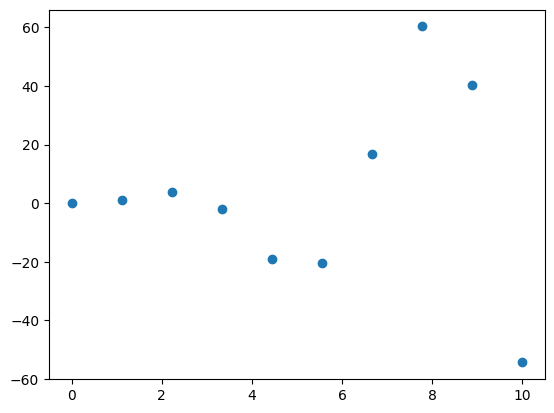

In [7]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x) 
plt.scatter(x, y)

In [8]:
from scipy.interpolate import interp1d

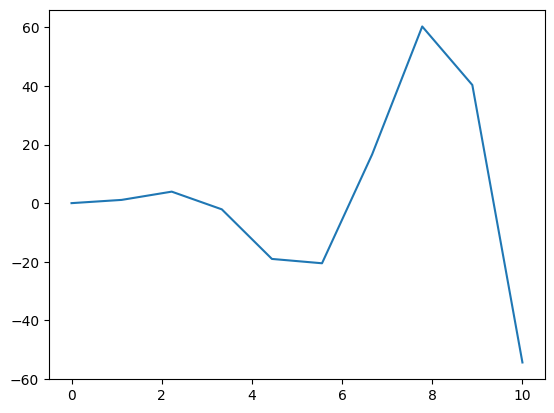

In [9]:
f = interp1d(x, y, kind='linear')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense) # not the best way to make as interpolation

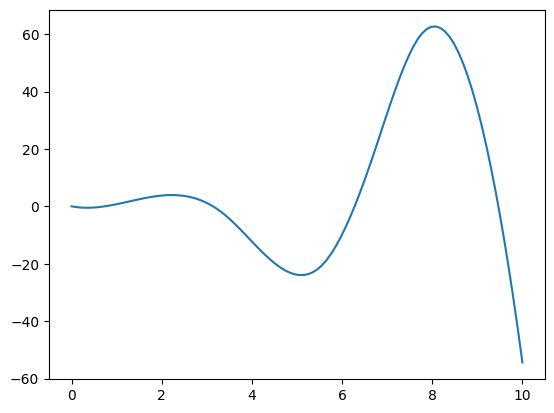

In [10]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense) # probably much closer to the actual function

## Curve Fitting

Trivial Example

In [11]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2  + 2

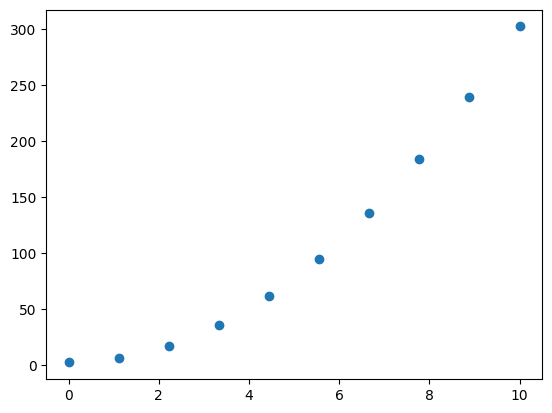

In [12]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y=ax^2+b$. The main goal here is determine the values of $a$ and $b$

In [13]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1))
popt

array([3., 2.])

In [14]:
pcov

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

The equation for spring motion is $y(t)=Acos(\omega t + \phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [15]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

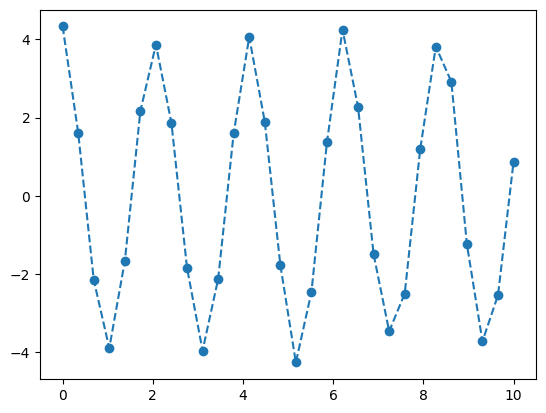

In [16]:
plt.plot(t_data, y_data, 'o--')

$\omega = 2\pi f, \space f=1/T, and \space T \approx 2 seconds. \space Thus \space good \space initial \space guess \space is$

$\omega = \pi$ <br>
$\phi = 0$<br>
$A = 4$

In [17]:
def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))

In [18]:
A, w, phi = popt

In [19]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

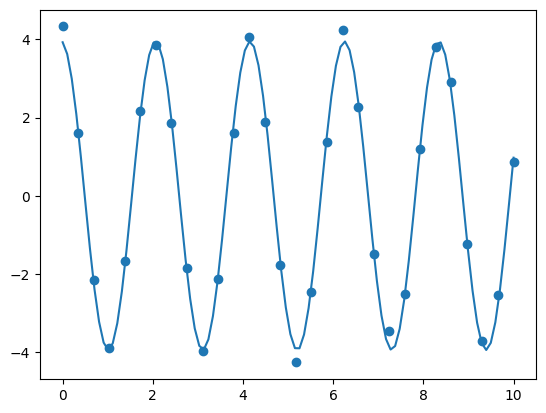

In [20]:
plt.scatter(t_data, y_data)
plt.plot(t, y)

In [21]:
# variance of the three values 
np.diag(pcov)

array([2.61882717e-03, 1.85637335e-05, 6.63423791e-04])

## Special Functions

Legendre Polynomials $P_l(x):$ satisfy  $(1-x^2)y''-2xy'+l(l+1)y=0$ <br><br>

The angular componenet of the spherical Schrodinger Equation which permits non-infinite solutions

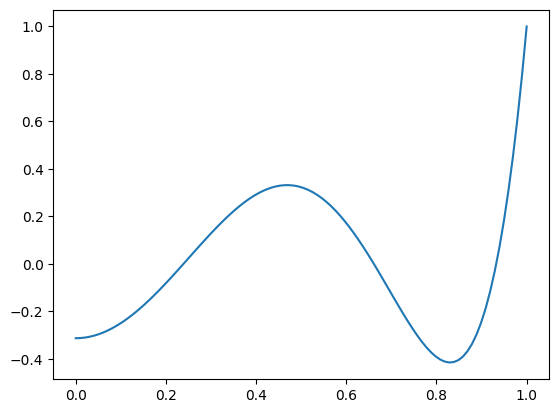

In [22]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))


Bessel function $J_n(x):$ satisfy $x^2y'' + xy' + (x^2-a^2)y-0$<br><br>
Laplace's Equation in Polar Coordinates

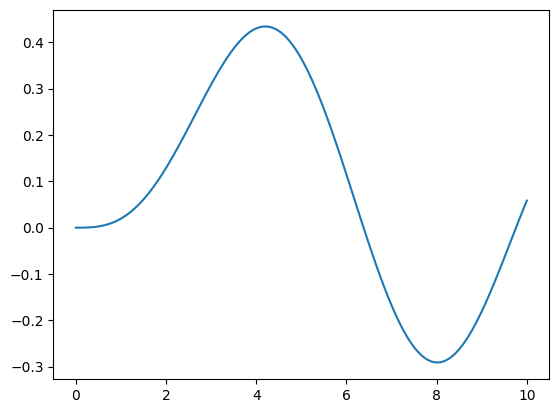

In [23]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3, x))

# Calculus

## Differentiation

In [24]:
from scipy.misc import derivative

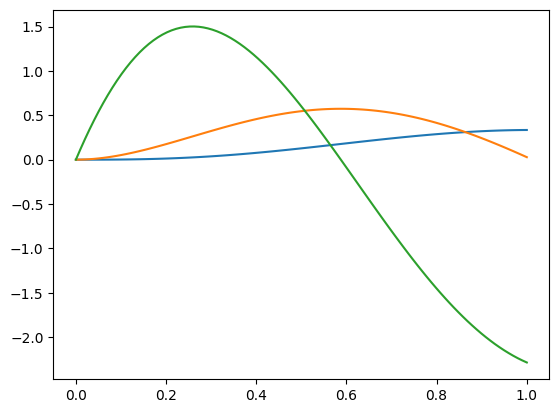

In [25]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y)
y_dash = derivative(f, x, 1e-6)
plt.plot(x, y_dash)

y_dash = derivative(f, x, 1e-6, n=2)
plt.plot(x, y_dash)

## Integration

Single Integral

$\int\limits_0^1 x^2sin(2x)e^{-x}dx$

In [26]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)

In [27]:
integral, integral_error = quad(integrand, 0, 1)

In [28]:
integral

0.14558175869954834

In [29]:
integral_error

1.6162822047366225e-15

Double Integral

$\int\limits_0^1 \int\limits_{-x}^{x^2}sin(x+y^2)dydx$

In [30]:
from scipy.integrate import dblquad
integrand = lambda x, y: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)


In [31]:
integral

0.315802507240474

In [32]:
integral_error

1.5634600713498928e-14

n dimensional integrals

In [33]:
from scipy.integrate import nquad

In [34]:
# do it yourself lol  

# Differential Equations

<bold>First Order ODEs</bold>

Air friction while falling

$v'-\alpha v^2 + \beta = 0 \space \space \space \space v(0) = 0$

In [7]:
from scipy.integrate import odeint

In [36]:
def dvdt(v, t):
    return 3*v**2 - 5
v0 = 0

In [37]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

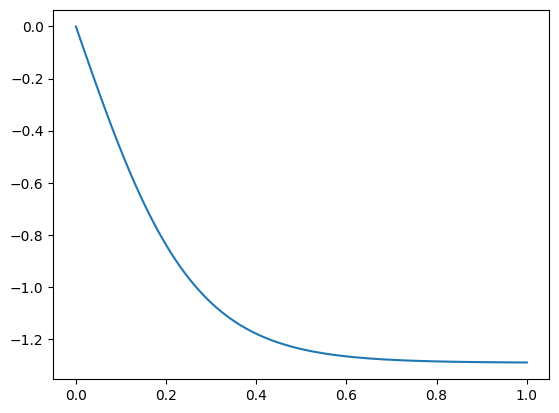

In [38]:
v_sol = sol.T[0]
plt.plot(t, v_sol)

<bold>Coupled first order ODEs</bold>

$y_1' = y_1 + y_2^2 + 3x \space\space\space\space y_1(0) = 0$ <br>
$y_2' = 3y_1  + y_2^3 - cos(x) \space\space\space\space y_2(0) = 0$

Letting $S = (y_1, y_2) $ we need to write a function that returns <br>
$dS/dx = (dy_1/dx, dy_2/dx)$.The function $dS/dx$ can take in $S = (y_1, y_2)$ and $x$ 

In [39]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2 + 3*x,
            3*y1 + y2**2 - np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [40]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, t)


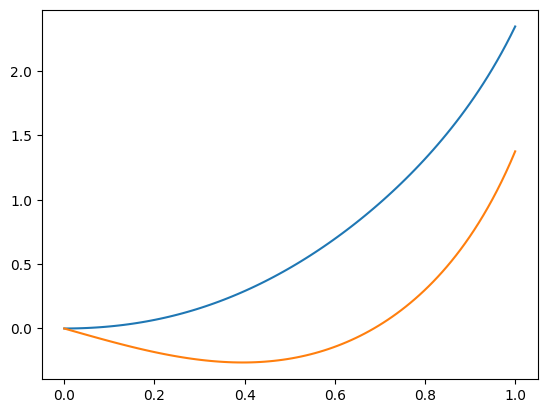

In [41]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]
plt.plot(t, y1_sol)
plt.plot(t, y2_sol)

<b>Second Order ODEs</b><br>

Equation for a pendulum

$$\theta^{''} - sin(\theta) = 0$$
Scipy can oly solve coupled first order ODEs, but <b>any second order ODE can be turned into two coupled first orderODEs</b>. The same thing goes for higher order ODEs.

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs
$$d\omega/dt = sin(\theta) \&d\theta/dt = \omega$$

Let S = $(\theta, \omega)$

In [5]:
def dSdx(S, t):
    theta, omega = S
    return [omega, np.sin(theta)]

theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [8]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdx, S0, t)
theta, omega = sol.T

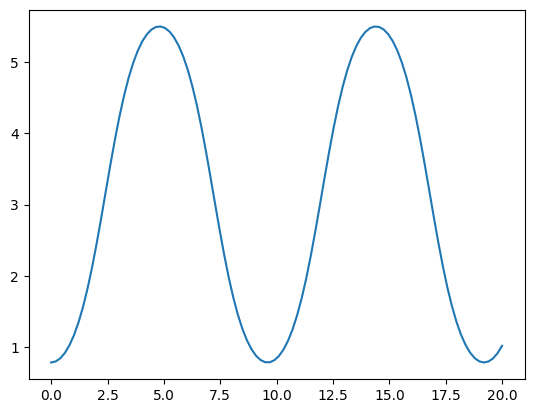

In [9]:
plt.plot(t, theta)


<h2>Fourier Transformations</h2><br>
The discrete Fourier transform is defined as

$$y[k] = \sum\limits_{n=0}^{N-1}e^{-2\pi in(k/N)}x[n]$$


- $k/N$ represents a specific frequency (dimensionless)
- can be converted to a frequency (Hz) if you know the spacing in x

In [2]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))

NameError: name 'np' is not defined

In [3]:
plt.plot(t, x)

NameError: name 'plt' is not defined

In [47]:
from scipy.fft import fft, fftfreq
N = len(x)
y = fft(x)

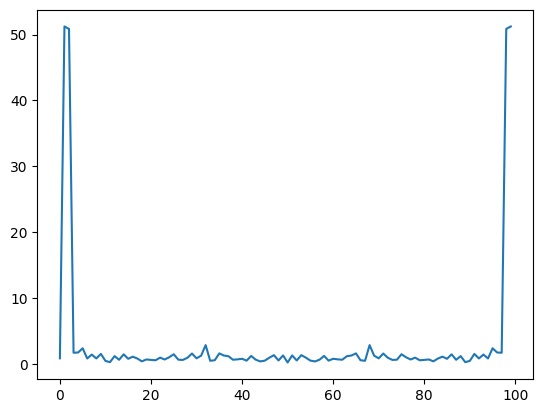

In [48]:
plt.plot(np.abs(y))

In [49]:
y = fft(x)[:N//2]

In [50]:
f = fftfreq(N, np.diff(t)[0])[:N//2]

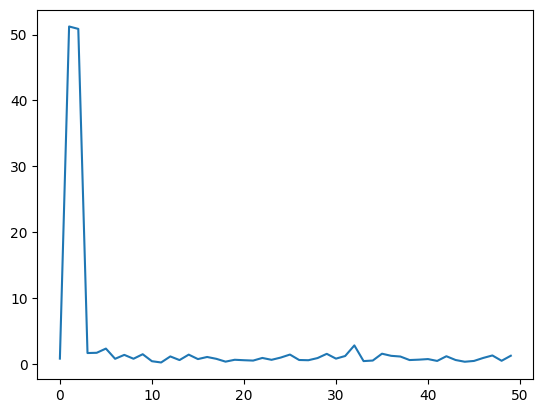

In [51]:
plt.plot(np.abs(y))

### Examples

__Example 1__. The energy required to get from point $\vec{r}_1$ to point $\vec{r}_2$ for a plane is given by 

$$E = \alpha \int\limits_C \bigg|\frac{d\vec{r}}{dt}\bigg|dt - \int\limits_C \vec{F} \cdot \frac{d\vec{r}}{dt}dt$$

Suppose that $\alpha = 5$ and out start and end points are $\vec{r}_1 = (0, 0)$ and $\vec{r}_2 = (0, 10)$. On this particular day, the wind produces a force field $\vec{F} = (0, -2/(x+1)^2)$. Find the optimal value of $A$ in $\vec{r}(t)=Asin(\pi t/10)\hat{x} + t\hat{y}$ that minimizes the work

Then $x = Asin(\pi t/10), y=t$ and 
$$\bigg | \frac{d\vec{r}}{dt} \bigg| = \sqrt{1+(\pi A/10)^2cos^2(\pi t/10)}$$
$$\vec{F}\cdot d\vec{r} = \begin{bmatrix} 0 \& -2/(Asin(\pi t/10)+1)^2 \end{bmatrix} \cdot \begin{bmatrix} \pi A/10 cos(\pi t/10) \& 1 \end{bmatrix} = -2/(Asin(\pi t/10) + 1)^2$$
so that
$$E = \int\limits_0^{10}\bigg(5\sqrt{1+(\pi A/10)^2cos^2(\pi t/10)} + \frac{2}{(Asin(\pi t/10)+1)^2}\bigg)dt$$

In [52]:
def f(A):
    integrand = lambda t: 2 / (1 + np.abs(A*np.sin(np.pi*t/10)))**2 + 5*np.sqrt(1+(np.pi*A/10)**2 * np.cos(np.pi * t / 10)**2)
    return quad(integrand, 0, 10)[0]

minimize(f, 0.001, method="CG").x

array([1.42591231])

Newton's law of cooling is
$$\frac{dT}{dt}=-k(T-T_s(t))$$
where $T$ is the temperature of an object in the surroundings with temperature $T_s(t)$ (which may depend on time).Suppose $T$ represents the temperature of a shallow pool of water and $T_s(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside:

In [53]:
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

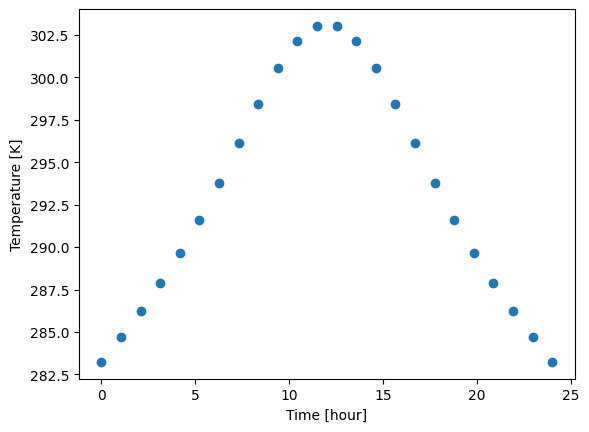

In [54]:
plt.scatter(t_m, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [55]:
Ts = interp1d(t_m, temp_m, 'cubic')

In [56]:
def dTdt(T, t):
    return -0.5*(T-Ts(t))

times = np.linspace(1, 23, 1000)
T0 = 284.6945461

In [57]:
sol = odeint(dTdt, T0, times).T[0]

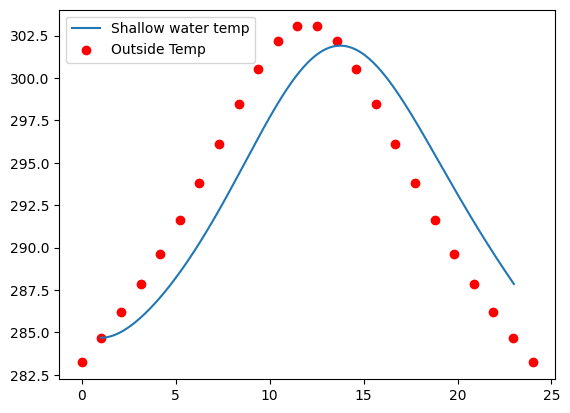

In [58]:
plt.plot(times, sol, label='Shallow water temp')
plt.scatter(t_m, temp_m, color='r', label='Outside Temp')
plt.legend()

## Linear Algebra

### Basics

Triangular matrices
$$\begin{bmatrix}3 & 0 & 0 & 0 \\ 2 & 1 & 0 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 1 & 1 & 1\end{bmatrix} \vec{x} = \begin{bmatrix} 4 \\ 2 \\ 4 \\ 2 \end{bmatrix}$$

In [59]:
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

Toeplitz Matrices
$$\begin{bmatrix} 1 & -1 & 2 & 3 \\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1 \\ 2 \\ 2 \\ 5 \end{bmatrix}$$

In [60]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])    # First column of T
r = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c, r), b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

## EigenValue Problems
Eigenvlaue problems can be solved using numpy, so here we focus on particular cases for optimization

In [61]:
from scipy.linalg import eigh_tridiagonal

$$\begin{bmatrix} 3 & -1 & 0 & 0 \\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda x$$

In [62]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e)


In [68]:
v.T[1]

array([ 0.60150096,  0.37174803, -0.37174803, -0.60150096])

In [63]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [64]:
A@v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

In [65]:
w[0] * v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

## Special Matrices

Fielder matrix $A_{ij}  = |a_i - a_j|$ where $a_i$ is some sequence of number

In [69]:
from scipy.linalg import fiedler
fiedler([1, 4, 12, 45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

Toeplitz matrix

In [70]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,6,0,0], [1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [6, 3, 2, 1, 4, 5],
       [0, 6, 3, 2, 1, 4],
       [0, 0, 6, 3, 2, 1]])

https://docs.scipy.org/doc/scipy/reference/linalg.html#special-matrices